In [1]:
library(brms)
library(readxl)
library(effects)
library(sjPlot)

Loading required package: Rcpp

Loading 'brms' package (version 2.19.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following object is masked from ‘package:stats’:

    ar


Loading required package: carData

lattice theme set by effectsTheme()
See ?effectsTheme for details.

Learn more about sjPlot with 'browseVignettes("sjPlot")'.



In [2]:
library(tidyverse)        # ggplot, dplyr, %>%, and friends
library(brms)             # Bayesian modeling through Stan
library(tidybayes)        # Manipulate Stan objects in a tidy way
library(broom)            # Convert model objects to data frames
library(broom.mixed)      # Convert brms model objects to data frames
library(extraDistr)       # Use extra distributions like dprop()
library(ggdist)           # Special geoms for posterior distributions
library(gghalves)         # Special half geoms
library(ggbeeswarm)       # Special distribution-shaped point jittering
library(ggrepel)          # Automatically position labels
library(patchwork)        # Combine ggplot objects
library(marginaleffects)  # Calculate marginal effects for frequentist models
library(emmeans)          # Calculate marginal effects in even fancier ways
library(modelsummary)     # Create side-by-side regression tables

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘tidybayes’


The following objects are masked from ‘package:brms’:

    dstudent_t, pstudent_t, qstudent_t, rstudent_t



Attaching package: ‘extraDistr’


The following object is masked from ‘package:purrr’:

    rdunif


The following objects are masked from ‘package:brms’:

    ddirichlet, dfrechet, pfrechet, qfrechet, rdirichlet, rfrechet



Attaching package: ‘ggdist’


The following objects are masked from ‘package:brms’:

    dstudent_t, pstude

In [3]:
set.seed(1234)  # Make everything reproducible

## Preprocessing

We load the intertextuality data from the spreadsheet created in the previous notebook. Each row represents a (unique) pair of works. We are specifically interested in the `hit_ratio` column, or the number of intertexts that were measured for a given text pair (i.e. combinations of verse groups from a pair of works, with a distance below the optimal distance established on the annotated number of intertexts). This quantity has been normalized to the [0-1[ range, by dividing the absolute number of hits through the product of the length of the respective works in the pairs.

In [4]:
df <- read_excel("../figures/statistics.xlsx")
df

t1,t2,l1,l2,hits,genre1,genre2,subgenre1,subgenre2,author1,author2,hit_ratio
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Noch meer van wiven,Van der wive wonderlijcheit (lange versie),111,225,149,Epiek,Epiek,Didactiek,Didactiek,NA,NA,0.0059659660
Gwidekijn van Sassen,Ongeïdentificeerd (4),199,139,35,Epiek,Epiek,Karel,Karel,NA,NA,0.0012653194
Ongeïdentificeerd (4),Roman van Cassant,139,29,5,Epiek,Epiek,Karel,Kruisvaart,NA,NA,0.0012403870
Gwidekijn van Sassen,Roman van Cassant,199,29,5,Epiek,Epiek,Karel,Kruisvaart,NA,NA,0.0008664010
Ongeïdentificeerd (4),Roman van Antiochië,139,168,16,Epiek,Epiek,Karel,Kruisvaart,NA,NA,0.0006851662
Roman van Cassant,Vande Hertogen ende Heeren van Brabant,29,302,6,Epiek,Epiek,Kruisvaart,Historiografie,NA,NA,0.0006850879
Ogier van Denemarken,Ongeïdentificeerd (4),530,139,49,Epiek,Epiek,Karel,Karel,NA,NA,0.0006651283
Van den neghen besten (kort),Vande Hertogen ende Heeren van Brabant,71,302,14,Epiek,Epiek,Didactiek,Historiografie,NA,NA,0.0006529242
Brabantsche yeesten (B7),Roman van Cassant,18188,29,330,Epiek,Epiek,Historiografie,Kruisvaart,NA,NA,0.0006256493


We limit this dataset to work pairs where both authors are known to keep our analysis maximally reliable:

In [5]:
df <- df[!is.na(df['author1']), ]
df <- df[!is.na(df['author2']), ]
df

t1,t2,l1,l2,hits,genre1,genre2,subgenre1,subgenre2,author1,author2,hit_ratio
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Korte kroniek van Brabant (korte versie 1),Korte kroniek van Brabant (lange versie),373,1989,432,Epiek,Epiek,Historiografie,Historiografie,Jan van Boendale,Heraut Beyeren,5.822911e-04
Korte kroniek van Brabant (lange versie),Rijmkroniek van Woeringen,1989,9538,3207,Epiek,Epiek,Historiografie,Historiografie,Heraut Beyeren,Jan van Heelu,1.690468e-04
Brabantsche yeesten (B1-5),Van den derden Eduwaert,6584,2017,2160,Epiek,Epiek,Historiografie,Historiografie,Jan van Boendale,Jan van Boendale,1.626515e-04
Brabantsche yeesten (B1-5),Rijmkroniek van Woeringen,6584,9538,9229,Epiek,Epiek,Historiografie,Historiografie,Jan van Boendale,Jan van Heelu,1.469628e-04
Rijmkroniek van Woeringen,Van den derden Eduwaert,9538,2017,2705,Epiek,Epiek,Historiografie,Historiografie,Jan van Heelu,Jan van Boendale,1.406061e-04
Brabantsche yeesten (B1-5),Korte kroniek van Brabant (lange versie),6584,1989,1796,Epiek,Epiek,Historiografie,Historiografie,Jan van Boendale,Heraut Beyeren,1.371456e-04
Schepping,Sinte Jans ewangelium alsoe 't Augustijnken gheexponeert heeft,315,1050,44,Epiek,Epiek,Didactiek,Didactiek,Augustijnken,Augustijnken,1.330310e-04
Korte kroniek van Brabant (lange versie),Rijmbijbel,1989,35981,9283,Epiek,Epiek,Historiografie,Religie,Heraut Beyeren,Jacob van Maerlant,1.297121e-04
Korte kroniek van Brabant (lange versie),Van den derden Eduwaert,1989,2017,473,Epiek,Epiek,Historiografie,Historiografie,Heraut Beyeren,Jan van Boendale,1.179018e-04


The two main predictors in our analysis will two two (binary) factors:
- `author`: whether or not the works in a pair share their author
- `genre`: : whether or not the works in a pair share their epic (sub)genre

We construct those factors here (with a utility functions that treats the `NA`s properly):

In [6]:
compareNA <- function(v1,v2) {
    same <- (v1 == v2) | (is.na(v1) & is.na(v2))
    same[is.na(same)] <- FALSE
    return(same)
}

df['author'] <- compareNA(df['author1'], df['author2'])
df['genre'] <- compareNA(df['subgenre1'], df['subgenre2'])
df

t1,t2,l1,l2,hits,genre1,genre2,subgenre1,subgenre2,author1,author2,hit_ratio,author,genre
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Korte kroniek van Brabant (korte versie 1),Korte kroniek van Brabant (lange versie),373,1989,432,Epiek,Epiek,Historiografie,Historiografie,Jan van Boendale,Heraut Beyeren,5.822911e-04,FALSE,TRUE
Korte kroniek van Brabant (lange versie),Rijmkroniek van Woeringen,1989,9538,3207,Epiek,Epiek,Historiografie,Historiografie,Heraut Beyeren,Jan van Heelu,1.690468e-04,FALSE,TRUE
Brabantsche yeesten (B1-5),Van den derden Eduwaert,6584,2017,2160,Epiek,Epiek,Historiografie,Historiografie,Jan van Boendale,Jan van Boendale,1.626515e-04,TRUE,TRUE
Brabantsche yeesten (B1-5),Rijmkroniek van Woeringen,6584,9538,9229,Epiek,Epiek,Historiografie,Historiografie,Jan van Boendale,Jan van Heelu,1.469628e-04,FALSE,TRUE
Rijmkroniek van Woeringen,Van den derden Eduwaert,9538,2017,2705,Epiek,Epiek,Historiografie,Historiografie,Jan van Heelu,Jan van Boendale,1.406061e-04,FALSE,TRUE
Brabantsche yeesten (B1-5),Korte kroniek van Brabant (lange versie),6584,1989,1796,Epiek,Epiek,Historiografie,Historiografie,Jan van Boendale,Heraut Beyeren,1.371456e-04,FALSE,TRUE
Schepping,Sinte Jans ewangelium alsoe 't Augustijnken gheexponeert heeft,315,1050,44,Epiek,Epiek,Didactiek,Didactiek,Augustijnken,Augustijnken,1.330310e-04,TRUE,TRUE
Korte kroniek van Brabant (lange versie),Rijmbijbel,1989,35981,9283,Epiek,Epiek,Historiografie,Religie,Heraut Beyeren,Jacob van Maerlant,1.297121e-04,FALSE,FALSE
Korte kroniek van Brabant (lange versie),Van den derden Eduwaert,1989,2017,473,Epiek,Epiek,Historiografie,Historiografie,Heraut Beyeren,Jan van Boendale,1.179018e-04,FALSE,TRUE


Because the hit ratio's yield very small numbers, we multiply them by 1000 for the sake of readability:

In [7]:
df['hit_ratio'] <- df['hit_ratio'] * 1000
print(min(df['hit_ratio']))
print(max(df['hit_ratio']))

[1] 0
[1] 0.5822911


The mosaic plot below shows that the `TRUE` cases for both factors are severely outnumbered:

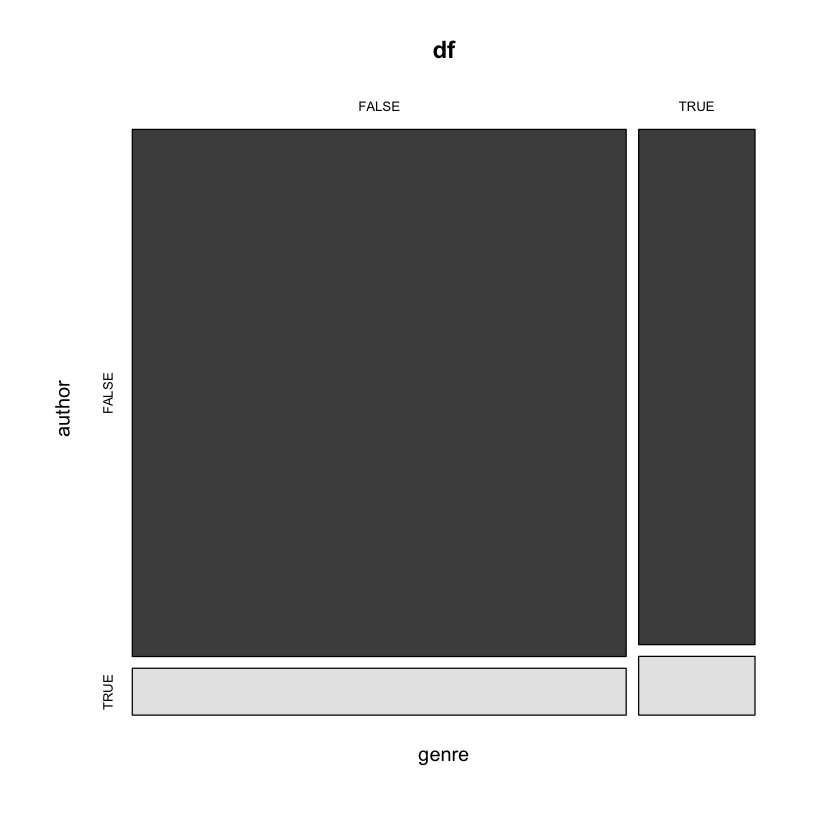

In [8]:
mosaicplot(genre ~ author, data=df, color=T)

## Bivariate test

We can start with some simple bivariate statistics to find out whether `author` and `genre` predict `hit_ratio`. The boxplots below, as well as the non-parametric Wilcoxon text, demonstrate that hit_ratios are obviously higher if the two works in a pair share their genre or authorship. Note, however, that the test statistic (*W*) is twice as high for genre than for author, although the effect for author is also "significant" in frequentist terms.

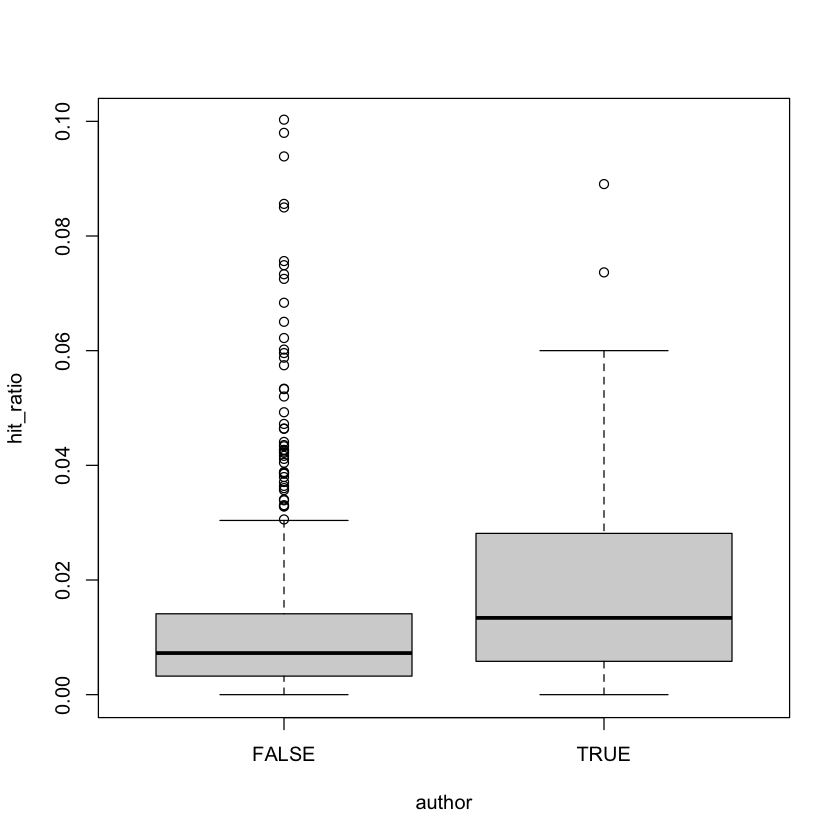

In [9]:
boxplot(hit_ratio ~ author, data=df, ylim=c(0,.10))

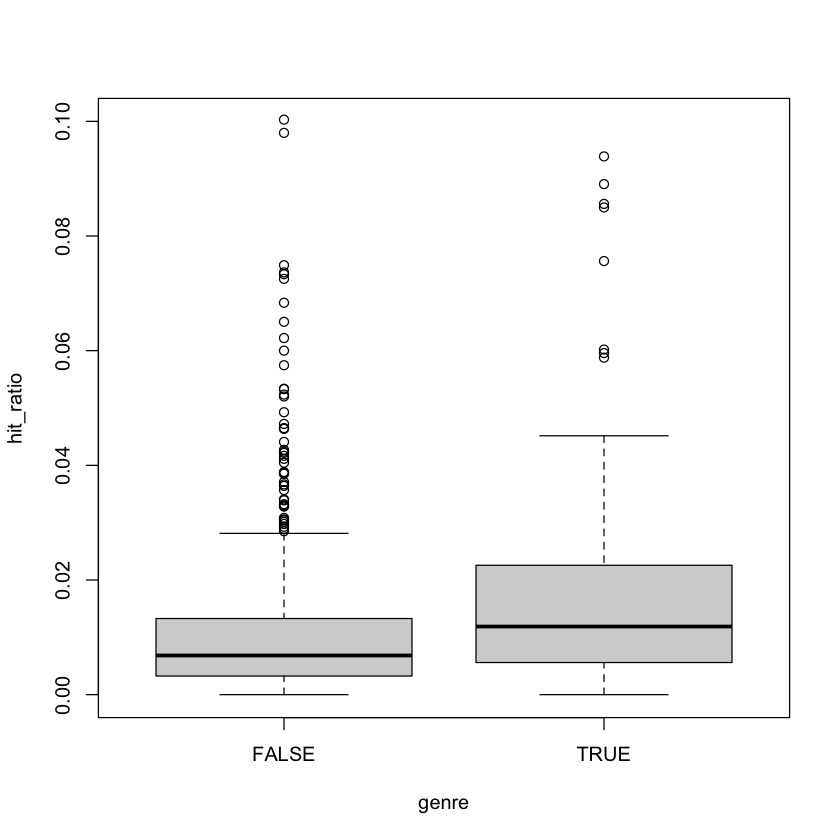

In [10]:
boxplot(hit_ratio ~ genre, data=df, ylim=c(0,.10))

In [11]:
wilcox.test(hit_ratio ~ author, data=df, paired=F, alternative='less', conf.int=TRUE)


	Wilcoxon rank sum test with continuity correction

data:  hit_ratio by author
W = 12052, p-value = 6.7e-05
alternative hypothesis: true location shift is less than 0
95 percent confidence interval:
         -Inf -0.002569067
sample estimates:
difference in location 
          -0.004568185 


In [12]:
wilcox.test(hit_ratio ~ genre, data=df, paired=F, alternative='less', conf.int=TRUE)


	Wilcoxon rank sum test with continuity correction

data:  hit_ratio by genre
W = 25006, p-value = 1.139e-06
alternative hypothesis: true location shift is less than 0
95 percent confidence interval:
         -Inf -0.002707168
sample estimates:
difference in location 
          -0.004261947 


Finally, we fit a naive linear model to the data:

In [13]:
m <- lm(hit_ratio ~ author + genre, data=df)
summary(m)


Call:
lm(formula = hit_ratio ~ author + genre, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.03769 -0.00932 -0.00520  0.00156  0.55446 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.010549   0.001316   8.015 4.97e-15 ***
authorTRUE  0.009854   0.004095   2.406   0.0164 *  
genreTRUE   0.017287   0.002916   5.928 4.95e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02955 on 663 degrees of freedom
Multiple R-squared:  0.0593,	Adjusted R-squared:  0.05646 
F-statistic:  20.9 on 2 and 663 DF,  p-value: 1.584e-09


The effect of genre, throughout our analysis, seems to be ca. twice as large as that of author.

A naive linear model:

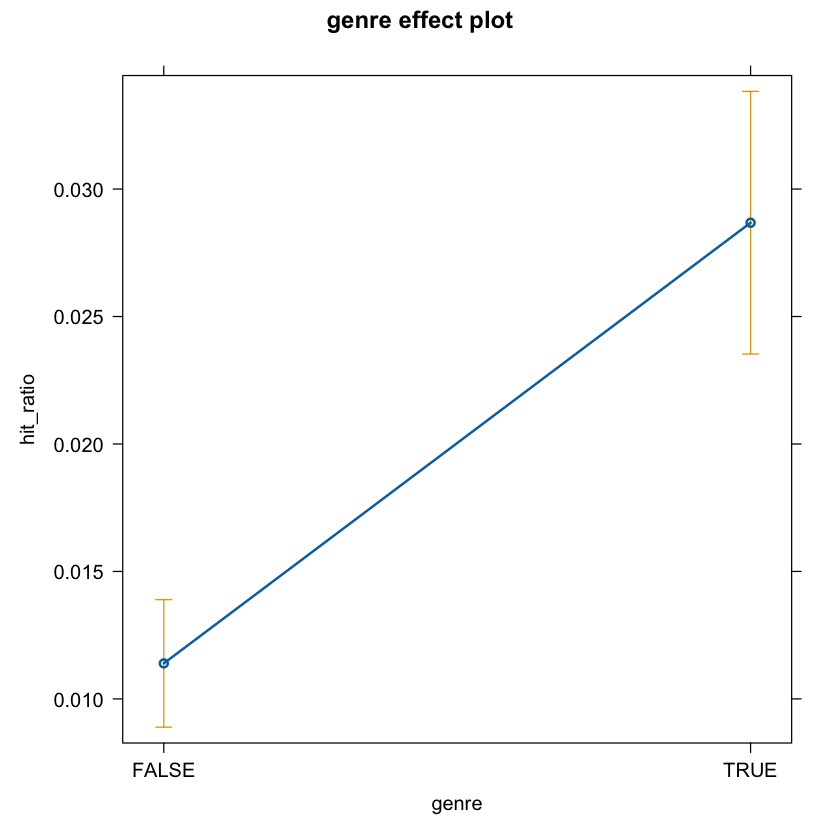

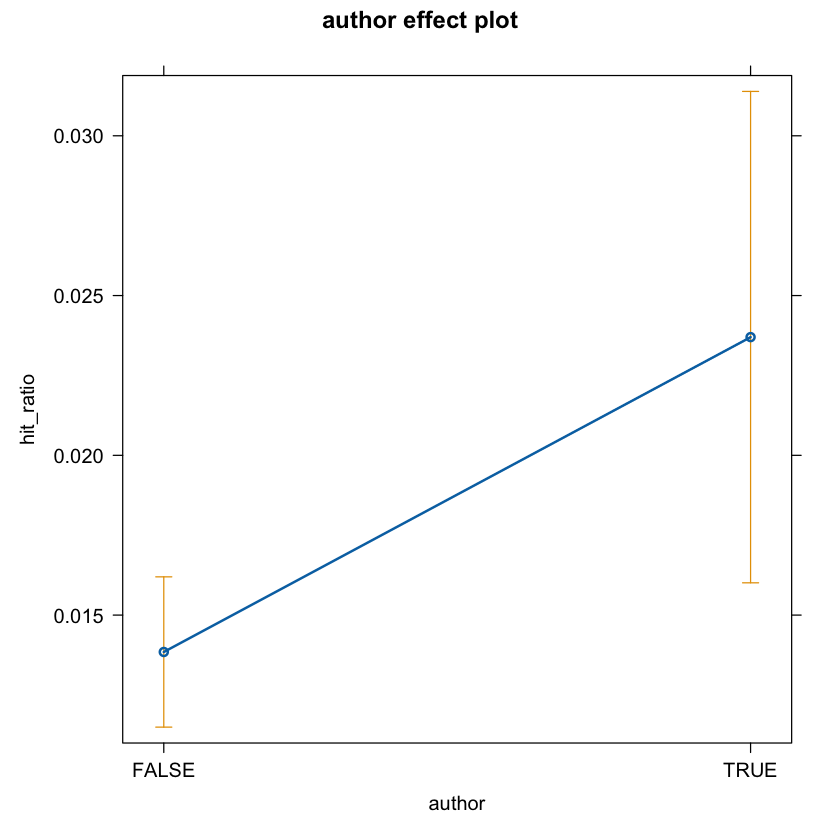

In [14]:
plot(effect('genre', m))
plot(effect('author', m))

Again, both predictors are considered useful additions, although the effect for author is again smaller than for genre.

## Model

The conventional analyses above probably suffice to illustrate our main point, i.e. that authorship *also* helps to predict the level of intertextuality between two texts, even though is effect is less strong than for genre. We can nevertheless also fit a more complex (Bayesian) model that is theoretically better motivated than a naive linear model.

After normalization, the dependent variable is a **proportion**, $ 0 \leq hit\_ratio \ < 1$:
- the proportion will often be zero, because no intertexts were found between two works
- the proportion can never be 1, because the works in a pair or never identical.

For modelling such a variable, the model *par excellence* seems to be a **zero-inflated beta regression**, that can be used to predict proportions that include zeroes. I took much inspiration from an excellent [blog post by Andrew Heiss](https://www.andrewheiss.com/blog/2021/11/08/beta-regression-guide/), who shows how to fit such a model in a Bayesian framework using the established R library [BRMS](https://cran.r-project.org/web/packages/brms/index.html), that offers a great interface to the underlying [Stan language](https://mc-stan.org/).

Below, we will fit and compare the following four models:
- `intercept-only` model (with no predictors)
- `genre-only` model (with only the `genre` predictor)
- `author-only` model (with only the `author` predictor)
- `covariate` model (with both the `author` and `genre` predictors)

Let's fit the models:

In [27]:
intercept_only <- brm(
  bf(hit_ratio ~ 1,
     phi ~ 1,
     zi ~ 1),
  data = df,
  family =  zero_inflated_beta(),
  chains = 4, iter = 2000, warmup = 1000,
  cores = 4, seed = 1234, 
)

Compiling Stan program...

Start sampling



In [28]:
genre_only <- brm(
  bf(hit_ratio ~ genre,
     phi ~ genre,
     zi ~ genre),
  data = df,
  family =  zero_inflated_beta(),
  chains = 4, iter = 2000, warmup = 1000,
  cores = 4, seed = 1234, 
)

Compiling Stan program...

Start sampling



In [29]:
author_only <- brm(
  bf(hit_ratio ~ author,
     phi ~ author,
     zi ~ author),
  data = df,
  family =  zero_inflated_beta(),
  chains = 4, iter = 2000, warmup = 1000,
  cores = 4, seed = 1234, 
)

Compiling Stan program...

Start sampling



In [30]:
covariate <- brm(
  bf(hit_ratio ~ genre + author,
     phi ~ genre + author,
     zi ~ genre + author),
  data = df,
  family =  zero_inflated_beta(),
  chains = 4, iter = 2000, warmup = 1000,
  cores = 4, seed = 1234, 
)

Compiling Stan program...

Start sampling



## Model comparison

To compare the relative usefulness of these four models, we add the **leave-one-out criterion** for each model, which currently seems to be the preferred method for model comparison in Bayesian statistics:

In [31]:
intercept_only <- add_criterion(intercept_only, 'loo')
author_only    <- add_criterion(author_only, 'loo')
genre_only     <- add_criterion(genre_only, 'loo')
covariate      <- add_criterion(covariate, 'loo')

Warning message:
“Found 1 observations with a pareto_k > 0.7 in model 'intercept_only'. It is recommended to set 'moment_match = TRUE' in order to perform moment matching for problematic observations. ”
Warning message:
“Found 2 observations with a pareto_k > 0.7 in model 'author_only'. It is recommended to set 'moment_match = TRUE' in order to perform moment matching for problematic observations. ”
Warning message:
“Found 1 observations with a pareto_k > 0.7 in model 'genre_only'. It is recommended to set 'moment_match = TRUE' in order to perform moment matching for problematic observations. ”
Warning message:
“Found 2 observations with a pareto_k > 0.7 in model 'covariate'. It is recommended to set 'moment_match = TRUE' in order to perform moment matching for problematic observations. ”


(*Note that in two models, the software complains about the Pareto $k$-values being to high, but this is only for a very small number of observations (2 x 1), so can safely ignore this.*)

We can now compare the four models:

In [32]:
loo <- loo_compare(intercept_only, author_only, genre_only, covariate,
                   criterion="loo")
loo

,elpd_diff,se_diff,elpd_loo,se_elpd_loo,p_loo,se_p_loo,looic,se_looic
covariate,0.00000,0.000000,1925.094,52.25876,16.03845,6.577225,-3850.188,104.5175
genre_only,-2.25870,4.662959,1922.835,51.23320,11.23599,5.143752,-3845.670,102.4664
author_only,-60.45493,32.473214,1864.639,69.08277,16.92772,9.475275,-3729.278,138.1655
intercept_only,-62.64416,29.626376,1862.450,66.10766,10.69478,7.266539,-3724.900,132.2153


As can be gleaned from the table above, the `covariate` model is clearly superior to the alternative model formulations. The `genre_only` model comes in second and, judging by the `elpd_diff` result, is more performant than the `author_only` model, which in turn only performs slightly better than the uninformative baseline model (`intercept_only`).

Finally, another method to compare the models is to consider their **Akaike weights**, which indicate how much statistical importance we should attach to differences in the Akaike informaton criterion values for each model (see [this paper](https://link.springer.com/article/10.3758/BF03206482); we previously applied this in a [paper](https://ceur-ws.org/Vol-3290/long_paper1591.pdf)). We can get those model weights as follows:

In [33]:
waic_wts <- model_weights(intercept_only, author_only, genre_only, covariate,
                          weights ="waic")
waic_wts

intercept_only    author_only     genre_only      covariate 
  3.939826e-28   4.968691e-27   4.307597e-02   9.569240e-01

Our previous observations are largely confirmed: the `covariate` model is assigned the lion's share of the model weights. The `genre_only` model is again (very slightly) better than the `author_only` model.

## Model inspection

We can now critically inspect the coefficients estimated for the predictors in the best model:

In [34]:
model_beta_zi <- covariate
model_beta_zi

 Family: zero_inflated_beta 
  Links: mu = logit; phi = log; zi = logit 
Formula: hit_ratio ~ genre + author 
         phi ~ genre + author
         zi ~ genre + author
   Data: df (Number of observations: 666) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
               Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept         -4.45      0.05    -4.54    -4.36 1.00     3804     3281
phi_Intercept      4.49      0.07     4.35     4.63 1.00     4106     2984
zi_Intercept      -2.84      0.19    -3.22    -2.48 1.00     7100     2967
genreTRUE          0.99      0.12     0.75     1.23 1.00     3007     2771
authorTRUE         0.43      0.13     0.18     0.69 1.00     3384     2887
phi_genreTRUE     -1.49      0.17    -1.84    -1.17 1.00     3018     2673
phi_authorTRUE    -0.18      0.22    -0.63     0.22 1.00     3408     3016
zi_genreTRUE      -0.60      0.58    -1.85     0.42 1

We note that the ranges of the estimated for `genreTRUE` and `authorTRUE` do not intersect with zero, indicating that the predictors meaningfully contribute to the model.

### Modelling the zeroes

In the case of the same genre, the proportion of 0s in the data is somewhat reduced:

In [23]:
zi_intercept <- tidy(model_beta_zi, effects = "fixed") %>% 
  filter(component == "zi", term == "(Intercept)") %>% 
  pull(estimate)

zi_genre <- tidy(model_beta_zi, effects = "fixed") %>% 
  filter(component == "zi", term == "genreTRUE") %>% 
  pull(estimate)

plogis(zi_intercept + zi_genre) - plogis(zi_intercept)

Warning message in tidy.brmsfit(model_beta_zi, effects = "fixed"):
“some parameter names contain underscores: term naming may be unreliable!”
Warning message in tidy.brmsfit(model_beta_zi, effects = "fixed"):
“some parameter names contain underscores: term naming may be unreliable!”


b_zi_Intercept 
   -0.02418518

For same author pairs, the zero reduction is stronger:

In [24]:
zi_author <- tidy(model_beta_zi, effects = "fixed") %>% 
  filter(component == "zi", term == "authorTRUE") %>% 
  pull(estimate)

plogis(zi_intercept + zi_author) - plogis(zi_intercept)

Warning message in tidy.brmsfit(model_beta_zi, effects = "fixed"):
“some parameter names contain underscores: term naming may be unreliable!”


b_zi_Intercept 
   -0.04255691

### Modelling the proportions:

In the case of a same-genre pairs, the proportion score is generally upped by 0.0237.

In [25]:
emmeans(covariate, ~ genre,
        regrid = "response") %>% 
  contrast(method = "revpairwise")

 contrast     estimate lower.HPD upper.HPD
 TRUE - FALSE   0.0237     0.015    0.0329

Results are averaged over the levels of: author 
Point estimate displayed: median 
HPD interval probability: 0.95 

For author the effect is smaller (only half of the augmentation):

In [26]:
emmeans(covariate, ~ author,
        regrid = "response") %>% 
  contrast(method = "revpairwise")

 contrast     estimate lower.HPD upper.HPD
 TRUE - FALSE   0.0109   0.00365    0.0189

Results are averaged over the levels of: genre 
Point estimate displayed: median 
HPD interval probability: 0.95 